In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
os.getcwd()

'/home/vizziwo/capcookie/models'

In [62]:
X_train = pd.read_csv('../data/processed/X2_train.csv', index_col=0)
X_test = pd.read_csv('../data/processed/X2_test.csv', index_col=0)
y_train = pd.read_csv('../data/processed/y2_train.csv', index_col=0)
y_test = pd.read_csv('../data/processed/y2_test.csv', index_col=0)

In [63]:
X_train.head()

,signs_of_mental_illness,body_camera,gender_F,gender_M,threat_level_attack,threat_level_not_attack,threat_level_unspecified,flee_Car,flee_Foot,flee_Not fleeing,...,armed_knife,armed_machete,armed_other,armed_sword,armed_toy weapon,armed_unarmed,armed_undetermined,armed_unknown weapon,armed_vehicle,standardized_age
2836,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0.740107
1157,1,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.504791
744,0,0,0,1,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0.269475
1448,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0.583230
3339,0,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,-0.907106


TRYING DUMMY CLASSIFIER

Because my data is imbalanced

In [64]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, plot_confusion_matrix, f1_score, recall_score
from sklearn.model_selection import cross_val_score


dummy = DummyClassifier(strategy='most_frequent', random_state=42)
dummy.fit(X_train, y_train)


DummyClassifier(random_state=42, strategy='most_frequent')

Accuracy: 0.5559183673469388
[[681   0]
 [544   0]]
ROC_AUC: 0.5


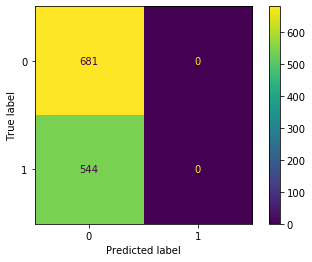

In [65]:
y_predict_dummy = dummy.predict(X_test)
print('Accuracy:', dummy.score(X_test, y_test))
print(confusion_matrix(y_test, y_predict_dummy))
plot_confusion_matrix(dummy, X_test, y_test)
predprob = dummy.predict_proba(X_test)[:,1]
print('ROC_AUC:', roc_auc_score(y_test, predprob))
f1_dum = f1_score(y_test, y_predict_dummy)
recall_dum = recall_score(y_test, y_predict_dummy)
auc_dum = roc_auc_score(y_test, dummy.predict_proba(X_test)[:,1])

In [66]:
cv_scores_test= cross_val_score(dummy,X_test,y_test,cv=5,scoring='f1')
cv_scores_train= cross_val_score(dummy,X_train,y_train,cv=5,scoring='f1')
print(cv_scores_test)
cv_scores_dum_test= cv_scores_test.mean()
cv_scores_dum_train= cv_scores_train.mean()
cv_scores_std_dum= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_dum_test))
print ('Mean cross validation train score: ' +str(cv_scores_dum_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_dum))

[0. 0. 0. 0. 0.]
Mean cross validation test score: 0.0
Mean cross validation train score: 0.0
Standard deviation in cv scores: 0.0


Since, I'm interested mostly in how many 'True' were predicted 'True,' the F1 Score seems especially useful for me. I may also want to look at 'Recall' to judge a model by its false negatives.

SUPERVISED LEARNING

SVM 

[[459 222]
 [188 356]]
0.6653061224489796
0.6345811051693404


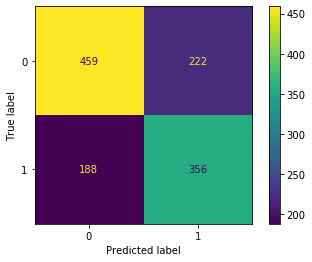

In [67]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)

# Predict using model:

y_predict_svm=svm.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_svm)
Accuracy_svm=svm.score(X_test,y_test)
f1_svm = f1_score(y_test, y_predict_svm)
recall_svm = recall_score(y_test, y_predict_svm)
auc_svm = roc_auc_score(y_test, svm.predict_proba(X_test)[:,1])

print(cnf_matrix)
print(Accuracy_svm)
print(f1_score(y_test, y_predict_svm))
plot_confusion_matrix(svm, X_test, y_test)

In [68]:
cv_scores_test= cross_val_score(svm,X_test,y_test,cv=5,scoring='f1')
cv_scores_train= cross_val_score(svm,X_train,y_train,cv=5,scoring='f1')
print(cv_scores_test)
cv_scores_svm_test= cv_scores_test.mean()
cv_scores_svm_train= cv_scores_train.mean()
cv_scores_std_svm= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_svm_test))
print ('Mean cross validation train score: ' +str(cv_scores_svm_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_svm))

[0.56603774 0.54285714 0.60185185 0.58823529 0.56730769]
Mean cross validation test score: 0.5732579433966782
Mean cross validation train score: 0.6368247200537531
Standard deviation in cv scores: 0.020266613895069268


The SVM does ok compared to this, given ROC_AUC. 0.5 compared to 0.67.

RANDOM FOREST

Accuracy: 0.6506122448979592
ROC_AUC: 0.6871733825688866
F1 Score: 0.5923809523809525
Recall Score: 0.5716911764705882


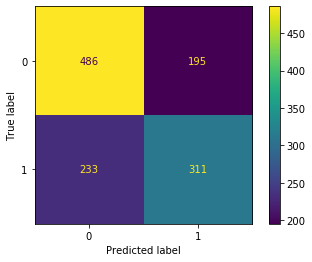

In [69]:
from sklearn.ensemble import RandomForestClassifier

#Apply RF to the training data:

rf = RandomForestClassifier(bootstrap=True,n_estimators=100,criterion='gini')
rf.fit(X_train, y_train)

#Predict using the model:

y_predict_rf = rf.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_rf)
plot_confusion_matrix(rf, X_test, y_test)
predprob = rf.predict_proba(X_test)[:,1]
Accuracy_rf=rf.score(X_test,y_test)
f1_rf = f1_score(y_test, y_predict_rf)
recall_rf = recall_score(y_test, y_predict_rf)
auc_rf = roc_auc_score(y_test, predprob)

print('Accuracy:', Accuracy_rf)
print('ROC_AUC:', roc_auc_score(y_test, predprob))
print('F1 Score:', f1_score(y_test, y_predict_rf))
print('Recall Score:', recall_score(y_test, y_predict_rf))


In [70]:
cv_scores_test= cross_val_score(rf,X_test,y_test,cv=5,scoring='f1')
cv_scores_train= cross_val_score(rf,X_train,y_train,cv=5,scoring='f1')
print(cv_scores_test)
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()
cv_scores_std_rf= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_rf))

[0.56338028 0.51020408 0.56038647 0.48309179 0.48484848]
Mean cross validation test score: 0.5203822218081688
Mean cross validation train score: 0.6029614698281585
Standard deviation in cv scores: 0.03523064233470789


GRADIENT BOOST

Accuracy: 0.6457142857142857
F1 Score: 0.5951492537313433
ROC-AUC: 0.6925396259825516
Recall Score: 0.5863970588235294


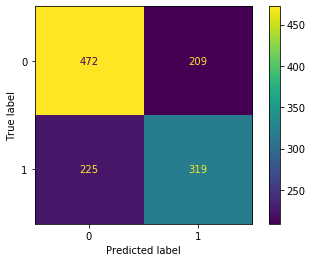

In [71]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
gbc = GradientBoostingClassifier(subsample=0.8, learning_rate=0.05 , n_estimators=160, random_state=5, max_depth=9, max_leaf_nodes=100)
gbc.fit(X_train, y_train)

#Predict using the model:

y_predict_gbc = gbc.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_gbc)
plot_confusion_matrix(gbc, X_test, y_test)
predprob = gbc.predict_proba(X_test)[:,1]
Accuracy_gbc=gbc.score(X_test,y_test)
f1_gbc = f1_score(y_test, y_predict_gbc)
recall_gbc = recall_score(y_test, y_predict_gbc)
auc_gbc = roc_auc_score(y_test, predprob)

print('Accuracy:', Accuracy_gbc)
print('F1 Score:', f1_score(y_test, y_predict_gbc))
print('ROC-AUC:', roc_auc_score(y_test, gbc.predict_proba(X_test)[:,1]))
print('Recall Score:', recall_score(y_test, y_predict_gbc))


In [72]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(gbc,X_test,y_test,cv=5,scoring='f1')
cv_scores_train= cross_val_score(gbc,X_train,y_train,cv=5,scoring='f1')
print(cv_scores_test)
cv_scores_gbc_test= cv_scores_test.mean()
cv_scores_gbc_train= cv_scores_train.mean()
cv_scores_std_gbc= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_gbc_test))
print ('Mean cross validation train score: ' +str(cv_scores_gbc_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_gbc))

[0.57142857 0.56074766 0.51401869 0.54285714 0.5       ]
Mean cross validation test score: 0.5378104138851804
Mean cross validation train score: 0.6122962140642741
Standard deviation in cv scores: 0.027119885177399723


LOGISTIC REGRESSION

Accuracy: 0.6742857142857143
F1 Score: 0.6402164111812443
ROC-AUC: 0.7141503627882871
Recall Score: 0.6525735294117647


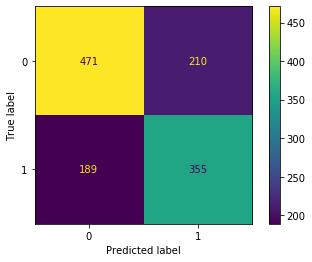

In [73]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_predict_lr = lr.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_predict_lr)
plot_confusion_matrix(lr, X_test, y_test)

predprob = lr.predict_proba(X_test)[:,1]
Accuracy_lr=lr.score(X_test,y_test)
f1_lr = f1_score(y_test, y_predict_lr)
recall_lr = recall_score(y_test, y_predict_lr)
auc_lr = roc_auc_score(y_test, predprob)

print('Accuracy:', Accuracy_lr)
print('F1 Score:', f1_score(y_test, y_predict_lr))
print('ROC-AUC:', roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))
print('Recall Score:', recall_score(y_test, y_predict_lr))


In [74]:
cv_scores_test= cross_val_score(lr,X_test,y_test,cv=5,scoring='f1')
cv_scores_train= cross_val_score(lr,X_train,y_train,cv=5,scoring='f1')
print(cv_scores_test)
cv_scores_lr_test= cv_scores_test.mean()
cv_scores_lr_train= cv_scores_train.mean()
cv_scores_std_lr= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_lr_test))
print ('Mean cross validation train score: ' +str(cv_scores_lr_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_lr))

[0.54271357 0.56074766 0.60747664 0.58767773 0.54285714]
Mean cross validation test score: 0.5682945469760485
Mean cross validation train score: 0.6373836118788063
Standard deviation in cv scores: 0.025570870647799636


In [75]:
models = ['dummy', 'svm', 'rf', 'gbc', 'lr']
auc = [auc_dum, auc_svm, auc_rf, auc_gbc, auc_lr]
recall = [recall_dum, recall_svm, recall_rf, recall_gbc, recall_lr]
cv_f1_train = [cv_scores_dum_train, cv_scores_svm_train, cv_scores_rf_train, cv_scores_gbc_train, cv_scores_lr_train]
cv_f1_test = [cv_scores_dum_test, cv_scores_svm_test, cv_scores_rf_test, cv_scores_gbc_test, cv_scores_lr_test]

df = pd.DataFrame(list(zip(models, auc, recall, cv_f1_train, cv_f1_test)),
                 columns = ['Model', 'AUC Score', 'Recall Score', 'CV F1 Scores: Train', 'CV F1 Scores: Test'])
df

,Model,AUC Score,Recall Score,CV F1 Scores: Train,CV F1 Scores: Test
0,dummy,0.500000,0.000000,0.000000,0.000000
1,svm,0.714291,0.654412,0.636825,0.573258
2,rf,0.687173,0.571691,0.602961,0.520382
3,gbc,0.692540,0.586397,0.612296,0.537810
4,lr,0.714150,0.652574,0.637384,0.568295


The highest performing models were SVM and Logistic Regression.

HYPERPARAMETER TUNING

Logistic Regression

In [76]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['none', 'l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring='f1')
grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.644612 using {'C': 100, 'penalty': 'none', 'solver': 'lbfgs'}
0.641185 (0.015728) with: {'C': 100, 'penalty': 'none', 'solver': 'newton-cg'}
0.644612 (0.013407) with: {'C': 100, 'penalty': 'none', 'solver': 'lbfgs'}
nan (nan) with: {'C': 100, 'penalty': 'none', 'solver': 'liblinear'}
0.641185 (0.015728) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.643081 (0.011999) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.641185 (0.015728) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.641185 (0.015728) with: {'C': 10, 'penalty': 'none', 'solver': 'newton-cg'}
0.644612 (0.013407) with: {'C': 10, 'penalty': 'none', 'solver': 'lbfgs'}
nan (nan) with: {'C': 10, 'penalty': 'none', 'solver': 'liblinear'}
0.641329 (0.015726) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.643105 (0.012235) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.641329 (0.015726) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.641185 (0.015728) with: {'C': 1.0,

0.648888888888889


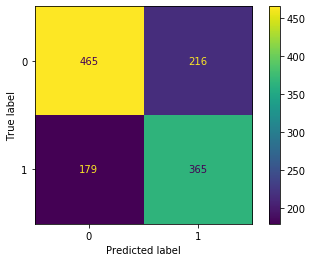

In [77]:
lr = LogisticRegression(C=100, penalty='none', solver='lbfgs')
lr.fit(X_train, y_train)
y_predict_lr_tune = lr.predict(X_test)
print(f1_score(y_test, y_predict_lr_tune))
plot_confusion_matrix(lr, X_test, y_test)


# help: CV on test scores or simple fit_predict?

# I forgot the point of Cross_val_score() 

# Why is the above code consistently giving me 0.64 test score, but the below Cross_val is 0.58. 
# Why do cross_val again?

In [78]:
cv_scores_train= cross_val_score(lr,X_train,y_train,cv=5,scoring='f1')
cv_scores_test= cross_val_score(lr,X_test,y_test,cv=5,scoring='f1')
print(cv_scores_test)
cv_scores_lr_test= cv_scores_test.mean()
cv_scores_lr_train= cv_scores_train.mean()
cv_scores_std_lr= cv_scores_test.std()
print ('Mean cross validation train score: ' +str(cv_scores_lr_train))
print ('Mean cross validation test score: ' +str(cv_scores_lr_test))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_lr))

[0.53080569 0.55238095 0.63348416 0.59728507 0.58715596]
Mean cross validation train score: 0.6432731466047212
Mean cross validation test score: 0.5802223667313454
Standard deviation in cv scores: 0.03575802575901395


TANGENT:

OF THE PEOPLE WHO THE MODEL PREDICTED TO BE BLACK, WHAT RACIAL IDENTITY DID THEY ACTUALLY BELONG TO?

In [79]:
idx = X_test[y_predict_lr == 1].index
df = pd.read_csv('../data/processed/fatalwrangling.csv', index_col=0)
df.loc[idx].race.value_counts()

B    201
W    190
H    154
A     13
N      4
O      3
Name: race, dtype: int64

USING SMOTE TO CREATE MORE SAMPLES OF MY LESS REPRESENTED CLASS

In [80]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.values)

FITTING MY TUNED MODEL (using the original training data) ON THE RESAMPLED TRAINING DATA

0.6460176991150443


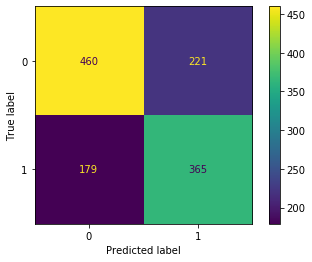

In [86]:
#Best: 0.634350 using {'C': 100, 'penalty': 'none', 'solver': 'lbfgs'}

clf = LogisticRegression(C=100, penalty='none', solver='lbfgs')
model_res = clf.fit(X_train_res, y_train_res)
y_predict_lr_res =  model_res.predict(X_test)
print(f1_score(y_test, y_predict_lr_res))
plot_confusion_matrix(model_res, X_test, y_test)

# Would I do the GridSearch / Hyperparameter tuning on the resampled data? Or use the tuned model from the non-resampled data? Anyway I tried both. 

Grid Search with Resampled Data

In [87]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['none', 'l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring='f1')
grid_result = grid_search.fit(X_train_res, y_train_res)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.665856 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.600442 (0.105344) with: {'C': 100, 'penalty': 'none', 'solver': 'newton-cg'}
0.635755 (0.044887) with: {'C': 100, 'penalty': 'none', 'solver': 'lbfgs'}
nan (nan) with: {'C': 100, 'penalty': 'none', 'solver': 'liblinear'}
0.616113 (0.074476) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.634817 (0.043118) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.620302 (0.066155) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.600442 (0.105344) with: {'C': 10, 'penalty': 'none', 'solver': 'newton-cg'}
0.635755 (0.044887) with: {'C': 10, 'penalty': 'none', 'solver': 'lbfgs'}
nan (nan) with: {'C': 10, 'penalty': 'none', 'solver': 'liblinear'}
0.635300 (0.047915) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.643123 (0.038147) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.638648 (0.044330) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.600442 (0.105344) with: {'C': 1.

0.6438356164383562


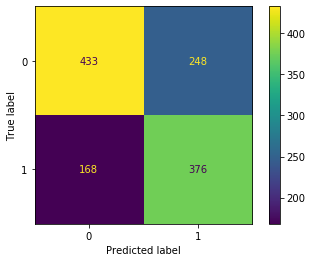

In [88]:
lr = LogisticRegression(C=0.1, penalty='l2', solver='liblinear')
lr.fit(X_train_res, y_train_res)
y_predict_lr_resampled = lr.predict(X_test)
print(f1_score(y_test, y_predict_lr_resampled))
plot_confusion_matrix(lr, X_test, y_test)

# AGAIN, I DON'T THINK I SHOULD BE DOING CV HERE, NEED SOME GUIDANCE 

In [89]:
#Trying CV again on the Test Data, using the BEST model above trained on resampled data.
# Best: 0.667437 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
lr = LogisticRegression(C=0.1, penalty='l2', solver='liblinear')
cv_scores_test= cross_val_score(lr,X_test,y_test,cv=5,scoring='f1')
print(cv_scores_test)
cv_scores_lr_test= cv_scores_test.mean()
cv_scores_std_lr= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_lr_test))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_lr))

[0.54358974 0.53588517 0.58937198 0.55445545 0.56038647]
Mean cross validation test score: 0.5567377621409386
Standard deviation in cv scores: 0.018391385913577852


THE SCORE DECREASED WHEN I RETUNED THE HYPERPARAMETERS USING THE RESAMPLED TRAINING DATA

Plotting Feature Importance - Logistic Regression

In [90]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.figure(figsize=(20,20))
    plt.rc('ytick', labelsize=20) 
    plt.rc('xtick', labelsize=20)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.rc('axes', titlesize=20)     # fontsize of the axes title
    plt.rc('axes', labelsize=20)   # fontsize of the x and y labels
    plt.title('Feature Importances for Tuned Logistic Regression Model')
    plt.xlabel('Size of Coefficient')
    plt.ylabel('Name of Feature')
    plt.show()

In [93]:
#BEST PERFORMING MODEL: TUNED on ORIGINAL DATA, FIT on RESAMPLED DATA

lr = LogisticRegression(C=100, penalty='none', solver='lbfgs')
model_res = lr.fit(X_train_res, y_train_res)
y_predict_lr_res =  model_res.predict(X_test)

#index of top features
print(lr.coef_.argsort()[:, -30:])
#names of top features, ascending
print(X_test.columns[lr.coef_.argsort()[:, -30:]])
#coefficients of top festures, ascending
print(np.sort(lr.coef_)[:, -30:])

[[32 46 51 22 42 56 19 71  4  5 31 17 44 27 33  6 47 45  2  0 79  3 65 64
  66  1 11 12 52 20]]
[['state_MA' 'state_NV' 'state_PA' 'state_FL' 'state_NE' 'state_TX'
  'state_CT' 'armed_machete' 'threat_level_attack'
  'threat_level_not_attack' 'state_LA' 'state_CA' 'state_NJ' 'state_IL'
  'state_MD' 'threat_level_unspecified' 'state_NY' 'state_NM' 'gender_F'
  'signs_of_mental_illness' 'standardized_age' 'gender_M' 'month'
  'day_of_week' 'season' 'body_camera' 'manner_of_death_shot'
  'manner_of_death_shot_and_tasered' 'state_RI' 'state_DC']]
[[-2.26130256 -2.18666427 -2.16940169 -2.12063232 -2.06447114 -2.04198618
  -2.03169437 -2.02743151 -1.89851641 -1.81445642 -1.79864413 -1.7840235
  -1.75096105 -1.71378855 -1.683963   -1.67012006 -1.46664651 -1.08845935
  -0.94060693 -0.89344312 -0.56011045 -0.11076373 -0.00852305  0.01552854
   0.01733345  0.33778642  0.65998326  0.67442915  1.24834198  2.58071793]]


In [95]:
X_train.columns

Index(['signs_of_mental_illness', 'body_camera', 'gender_F', 'gender_M',
       'threat_level_attack', 'threat_level_not_attack',
       'threat_level_unspecified', 'flee_Car', 'flee_Foot', 'flee_Not fleeing',
       'flee_unspecified', 'manner_of_death_shot',
       'manner_of_death_shot_and_tasered', 'state_AK', 'state_AL', 'state_AR',
       'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE',
       'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL',
       'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD',
       'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT',
       'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM',
       'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA',
       'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT',
       'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV', 'state_WY',
       'day_of_week', 'month

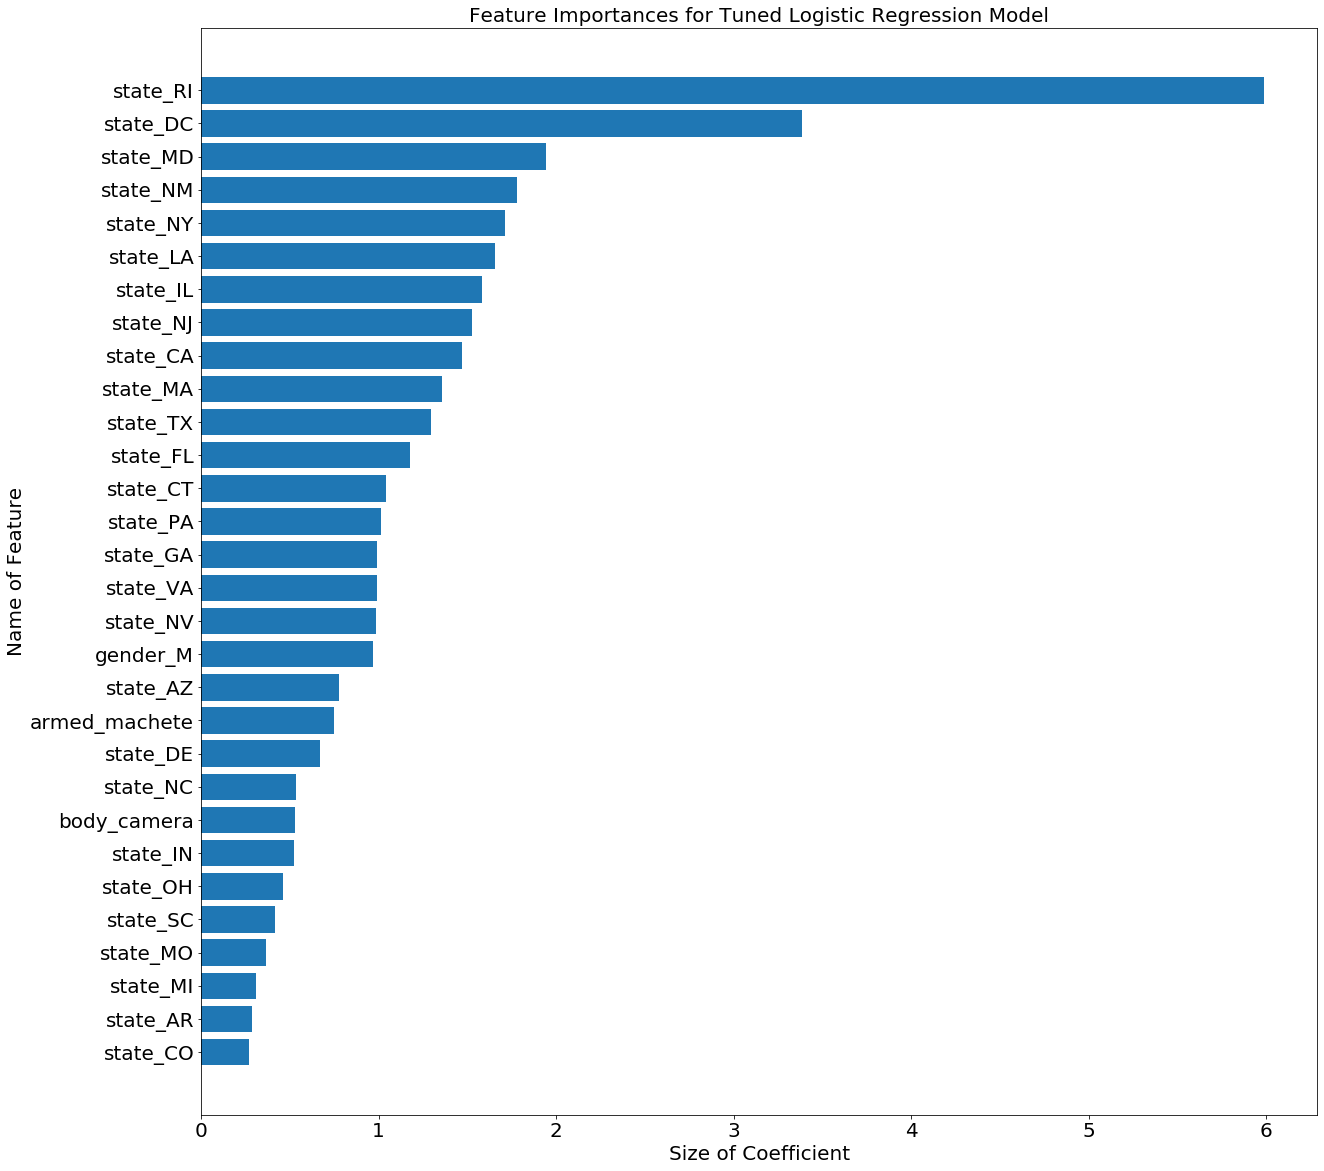

In [178]:
feature_names = X_test.columns[lr.coef_.argsort()[0, -30:]]
importances = np.sort(lr.coef_)[0, -30:]
f_importances(importances, feature_names)

SVM, Hyperparameter Tuning

In [179]:
#took 35 min
cw = ['balanced', None]

# svm.coef_ attribute is only availabel on linear kernels, so...
kernel = ['linear']

C = [0.01, .1, 1, 10, 100, 1000]
gamma = ['scale','auto']
grid = dict(class_weight=cw, kernel=kernel, C=C, gamma=gamma)

model = SVC()

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           cv=5, scoring='f1', error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# Why does my source that I'm following use cv = RepeatedStratifiedKFold(....) instead of cv=5? Is this an outdated thing, I think it automatically used Kfold or RepeatedStratifiedKFold with the cv arg.
https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

In [180]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.657177 using {'C': 100, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}
0.635972 (0.007029) with: {'C': 0.01, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}
0.635972 (0.007029) with: {'C': 0.01, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'linear'}
0.592417 (0.021821) with: {'C': 0.01, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear'}
0.592417 (0.021821) with: {'C': 0.01, 'class_weight': None, 'gamma': 'auto', 'kernel': 'linear'}
0.654776 (0.008018) with: {'C': 0.1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}
0.654776 (0.008018) with: {'C': 0.1, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'linear'}
0.628248 (0.015179) with: {'C': 0.1, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear'}
0.628248 (0.015179) with: {'C': 0.1, 'class_weight': None, 'gamma': 'auto', 'kernel': 'linear'}
0.655125 (0.009571) with: {'C': 1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}
0

In [181]:
#Took 5min
#Best: 0.657177 using {'C': 100, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}
svc= SVC(C=100, class_weight='balanced', gamma='scale', kernel='linear')

cv_scores_train= cross_val_score(svc,X_train,y_train,cv=5,scoring='f1')
cv_scores_test= cross_val_score(svc,X_test,y_test,cv=5,scoring='f1')
print(cv_scores_test)
cv_scores_lr_test= cv_scores_test.mean()
cv_scores_lr_train= cv_scores_train.mean()
cv_scores_std_lr= cv_scores_test.std()
print ('Mean cross validation train score: ' +str(cv_scores_lr_train))
print ('Mean cross validation test score: ' +str(cv_scores_lr_test))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_lr))

[0.5483871  0.58474576 0.66666667 0.6        0.63636364]
Mean cross validation train score: 0.657177254484677
Mean cross validation test score: 0.6072326325032722
Standard deviation in cv scores: 0.04099216306572147


In [182]:
#took 3min
#same but with X_train_res, y_train_res

svc= SVC(C=100, class_weight='balanced', gamma='scale', kernel='linear')

cv_scores_train= cross_val_score(svc,X_train_res,y_train_res,cv=5,scoring='f1')
cv_scores_test= cross_val_score(svc,X_test,y_test,cv=5,scoring='f1')
print(cv_scores_test)
cv_scores_lr_test= cv_scores_test.mean()
cv_scores_lr_train= cv_scores_train.mean()
cv_scores_std_lr= cv_scores_test.std()
print ('Mean cross validation train score: ' +str(cv_scores_lr_train))
print ('Mean cross validation test score: ' +str(cv_scores_lr_test))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_lr))

[0.5483871  0.58474576 0.66666667 0.6        0.63636364]
Mean cross validation train score: 0.6457748659229965
Mean cross validation test score: 0.6072326325032722
Standard deviation in cv scores: 0.04099216306572147


In [183]:
#took 3 min
svc= SVC(C=100, class_weight='balanced', gamma='scale', kernel='linear', probability=True)
#fit training set
svc.fit(X_train, y_train)
y_predict_svc = svc.predict(X_test)
#scores svc
predprob = svc.predict_proba(X_test)[:,1]
Accuracy_svc=svc.score(X_test,y_test)
f1_svc = f1_score(y_test, y_predict_svc)
recall_svc = recall_score(y_test, y_predict_svc)
auc_svc = roc_auc_score(y_test, predprob)

#fit resampled data
svc.fit(X_train_res, y_train_res)
y_predict_svc_res = svc.predict(X_test)

#scores svc_resampled
predprob = svc.predict_proba(X_test)[:,1]
Accuracy_svc_res=svc.score(X_test,y_test)
f1_svc_res = f1_score(y_test, y_predict_svc_res)
recall_svc_res = recall_score(y_test, y_predict_svc_res)
auc_svc_res = roc_auc_score(y_test, predprob)



models = ['fit_on_training_data', 'fit_on_resampled_training_data']
auc = [auc_svc, auc_svc_res]
recall = [recall_svc, recall_svc_res]
f1s = [f1_svc, f1_svc_res]

df = pd.DataFrame(list(zip(models, auc, recall, f1s)),
                 columns = ['Model', 'AUC Score', 'Recall Score', 'F1 Score'])
df

,Model,AUC Score,Recall Score,F1 Score
0,fit_on_training_data,0.710686,0.664286,0.638079
1,fit_on_resampled_training_data,0.710871,0.610714,0.622384


In [184]:
#took 
#Cross Validated F1 Score on Test Data
svc.fit(X_train, y_train)
cv = cross_val_score(svc, X_test, y_test,scoring='f1').mean()
print('Cross Validated F1 Score on Test Data:', cv)

Cross Validated F1 Score on Test Data: 0.6072326325032722


# I didn't try GridSearchCV for SVM fitting on the resampled training data. It took me a long time to do the GridSearch in the first place, so I'll wait til I hear from DJ before I do this.

In [185]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.figure(figsize=(20,20))
    plt.rc('ytick', labelsize=20) 
    plt.rc('xtick', labelsize=20)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.rc('axes', titlesize=20)     # fontsize of the axes title
    plt.rc('axes', labelsize=20)   # fontsize of the x and y labels
    plt.title('Feature Importances for Tuned SVC Model')
    plt.xlabel('Size of Coefficient')
    plt.ylabel('Name of Feature')
    plt.show()

In [186]:
#index of top features
print(svc.coef_.argsort()[:, -30:])
#names of top features, ascending
print(X_test.columns[svc.coef_.argsort()[:, -30:]])
#coefficients of top festures, ascending
print(np.sort(svc.coef_)[:, -30:])

[[91 85 72 96 88 99 29 41  1 20 17  3 92 24 22 59 47 52 23 28 57 33 45 18
  48 32 34 46 21 53]]
[['armed_knife' 'day_of_week_Thursday' 'month_February' 'armed_unarmed'
  'armed_Taser' 'armed_vehicle' 'state_IN' 'state_NC' 'body_camera'
  'state_CT' 'state_AZ' 'gender_M' 'armed_machete' 'state_GA' 'state_DE'
  'state_VA' 'state_NV' 'state_PA' 'state_FL' 'state_IL' 'state_TX'
  'state_MA' 'state_NJ' 'state_CA' 'state_NY' 'state_LA' 'state_MD'
  'state_NM' 'state_DC' 'state_RI']]
[[0.15175376 0.16828518 0.16975257 0.1779623  0.19815802 0.20746169
  0.24163512 0.29368842 0.45652337 0.55743277 0.5683124  0.63239316
  0.67069347 0.7068782  0.70775771 0.74652731 0.76980967 0.84503461
  0.90406591 1.02312841 1.0591682  1.09092585 1.1659713  1.17904228
  1.22607298 1.26618034 1.35104454 1.59266858 2.14537348 3.04935755]]


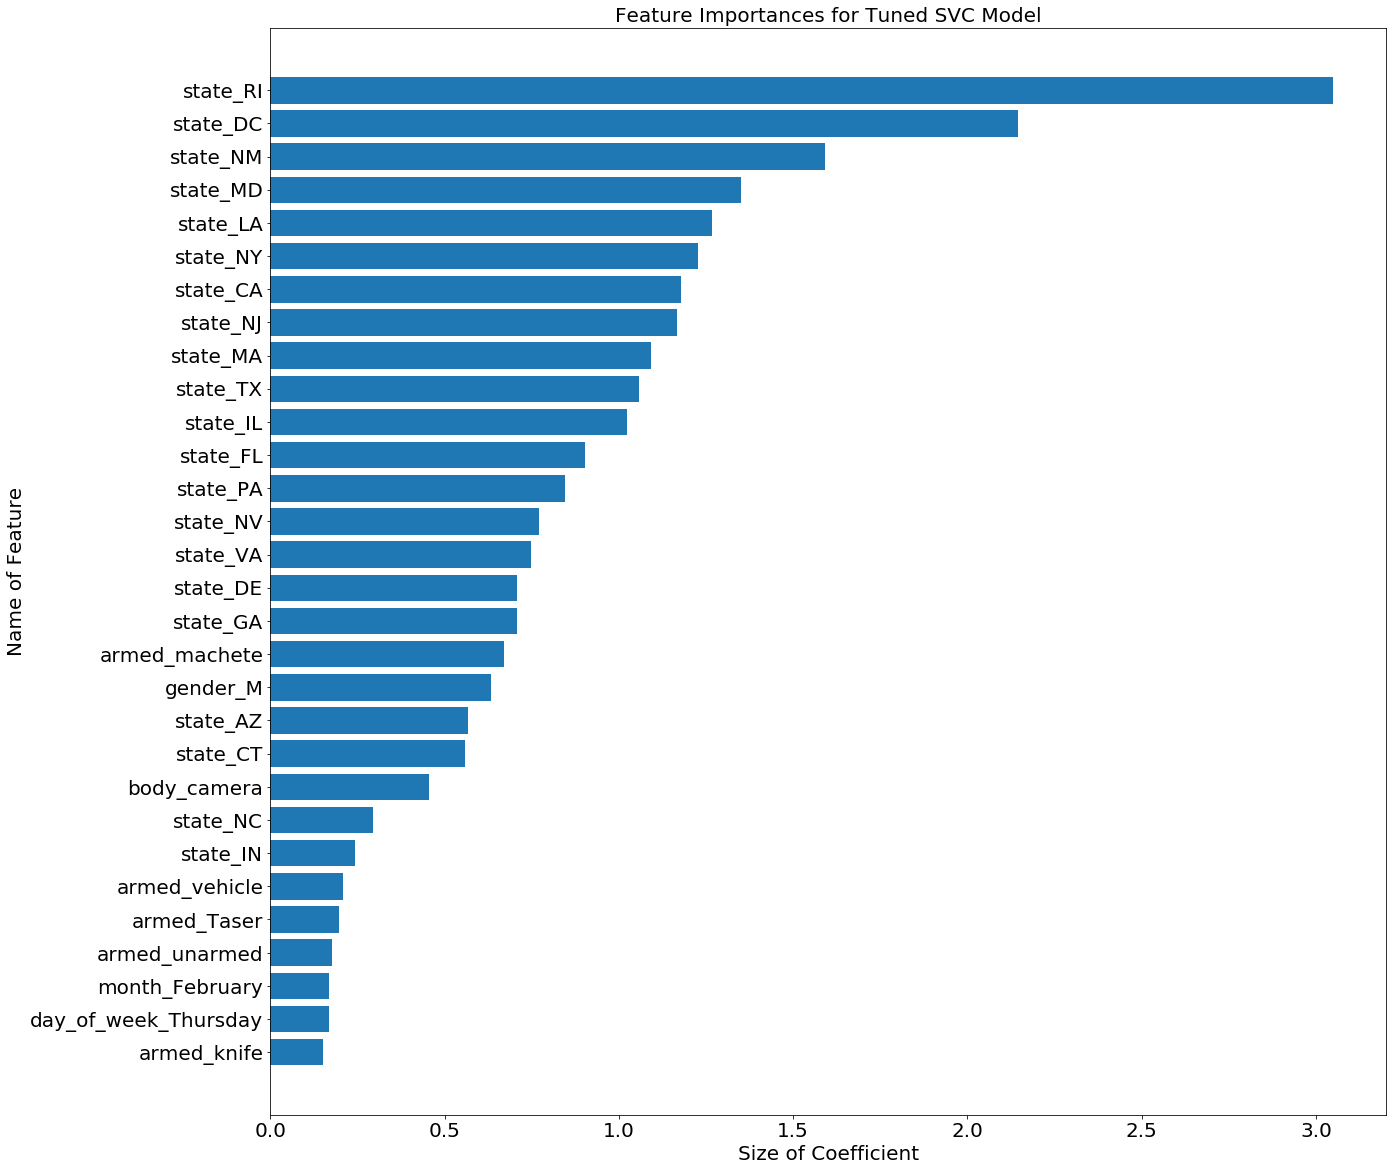

In [187]:
feature_names = X_test.columns[svc.coef_.argsort()[0, -30:]]
importances = np.sort(svc.coef_)[0, -30:]
f_importances(importances, feature_names)

# What do you think? Do I need to do L1 Regularization? 

# I'm confused about CV.
# The code I copied from the example, does GridSear